**INSTRUCTIONS**

For the assignment, you need to do the following steps :

1. Read the MovieLens dataset from a file (ratings.csv & movies.csv) instead of loading it directly with using the load_builtin method. For more informations, check the Surprise Dataset module documentation.

2. Create 2 model pipelines :

1st pipeline : Load data, Train test split, model training, prediction, evaluation.

2nd pipeline : Load data, cross validation.

3. Benchmark the User based and item based collaborative filtering models using the cosine and pearson correlation similarity metrics. In this step you need to use the data loaded in the 1st step.

**Notebook :**

Your notebook should be leasable, well organized and commented. It should contain 3 seperate parts :

- Data loading
- Model pipelines
- Model benchmarking


**Submission :**

The submission deadline is the 20 / 01 @ 17:42.

You need to push your code in a github repository and to send the link in the assignment tab.

Your repository hierarchy should be the same as the hierarchy used during the practical work (for more information check the shared github repository https://github.com/bachtn/recommender_system_practical_work_students)

**NB :** during the next session, I will verify that you are using a separate environment for the practical work. If not you will get a penalty on the practical work grade.

If you have any questions, you need to post them in the Discussions channel.

# Data loading

In [2]:
import pandas as pd
from pathlib import Path
from surprise import Dataset
from surprise import Reader
DATA_DIR = Path('../data/movielens/ml-latest-small')

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

ratings = Dataset.load_from_file(DATA_DIR / 'ratings.csv', reader=reader)


movies = pd.read_csv(DATA_DIR / 'movies.csv')

# Model Pipeline

## First Pipeline

**Load the data**

In [3]:
data = ratings

**Train test split**

In [4]:
from surprise.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train.n_users, train.n_items

(610, 8928)

In [5]:
from surprise.prediction_algorithms import KNNBasic

**Model Training user based**

In [6]:

# users based and cosine similarity
sim_options = {'name': 'cosine',
               'user_based': True  # compute  similarities between users
               }
algo_users_cos = KNNBasic(sim_options=sim_options)
model_users_cos = algo_users_cos.fit(train)
# users based and pearson correlation
sim_options = {'name': 'pearson_baseline',
               'shrinkage': 0  # no shrinkage
               }
algo_users_pears = KNNBasic(sim_options=sim_options)
model_users_pears = algo_users_pears.fit(train)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Model Training item based**

In [7]:
# item based and cosine similarity
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo_items_cos = KNNBasic(sim_options=sim_options)
model_items_cos = algo_items_cos.fit(train)

# user based and pearson correlation
sim_options = {'name': 'pearson_baseline',
               'shrinkage': 0  # no shrinkage
               }
algo_items_pears = KNNBasic(sim_options=sim_options)
model_items_pears = algo_items_pears.fit(train)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Predictions**

In [8]:
predictions_users_cos = model_users_cos.test(test)
predictions_users_pears = model_users_pears.test(test)
predictions_items_cos = model_items_cos.test(test)
predictions_items_pears = model_items_pears.test(test)

**Evaluation**

In [9]:
from surprise import accuracy

accuracy.rmse(predictions=predictions_users_cos)
accuracy.rmse(predictions=predictions_users_pears)
accuracy.rmse(predictions=predictions_items_cos)
accuracy.rmse(predictions=predictions_items_pears)

RMSE: 0.9806
RMSE: 0.9900
RMSE: 0.9800
RMSE: 0.9900


0.9900277794148814

## Second Pipeline

In [10]:
from surprise.model_selection import cross_validate
# Load Data
data = ratings
# Cross Validation
cv_users_cos = cross_validate(model_users_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
cv_users_pears = cross_validate(model_users_pears, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
cv_items_cos = cross_validate(model_items_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
cv_items_pears = cross_validate(model_items_pears, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity mat

# Model benchmarking

**Using GridSearchCV to implement the different model, the cross validation and finally to perfom the benchmarking**

In [11]:
from surprise.model_selection import GridSearchCV

param_grid = {'sim_options': {'name': ['pearson_baseline', 'cosine'],
                               'user_based': [False, True]}
              }
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [14]:
# Now we save our benchmarking on the dataframe for better computation and visualisation
benchmarking =pd.DataFrame.from_dict(gs.cv_results)[['mean_test_rmse', 'rank_test_rmse', 
       'mean_test_mae', 'rank_test_mae', 'mean_fit_time',
     'mean_test_time',
       'param_sim_options']]

In [15]:
# We rename the index
benchmarking = benchmarking.rename(index = {3:'users_based using cosine', 1:'users_based using pearson', 2:'items_based using cosine', 0:'items_based using pearson'}) 

In [16]:
benchmarking

,mean_test_rmse,rank_test_rmse,mean_test_mae,rank_test_mae,mean_fit_time,mean_test_time,param_sim_options
items_based using pearson,0.917384,1,0.695392,1,9.274814,5.441570,"{'name': 'pearson_baseline', 'user_based': False}"
users_based using pearson,0.971917,3,0.748890,3,0.550858,1.076639,"{'name': 'pearson_baseline', 'user_based': True}"
items_based using cosine,0.978076,4,0.762096,4,13.420808,5.419046,"{'name': 'cosine', 'user_based': False}"
users_based using cosine,0.971786,2,0.748470,2,0.429557,1.145253,"{'name': 'cosine', 'user_based': True}"


> - items- based model using pearson is the best considering the RMSE
> - items- based model using pearson is also the best considering the mae
> - user- based model using cosine is the fastest considering the fit 
> - user- based model using pearson is the fastest considering the test time

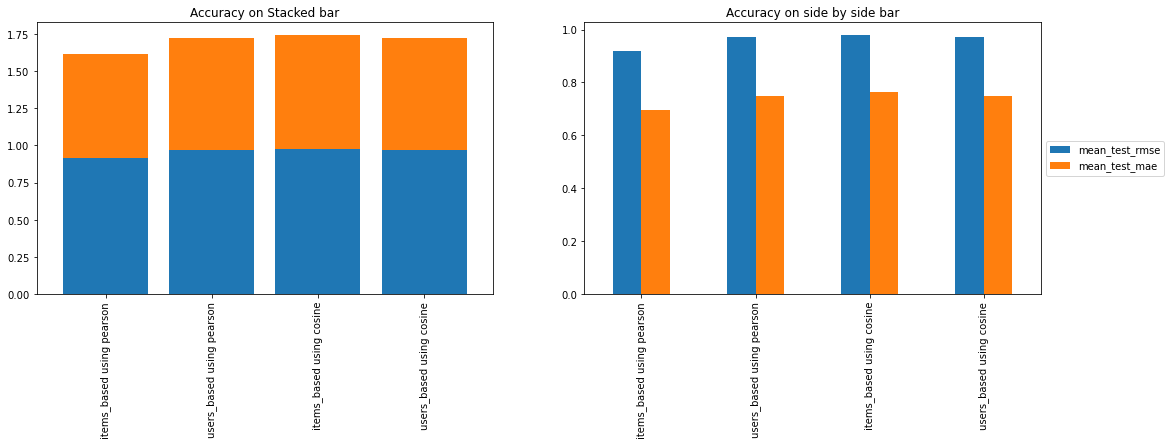

In [19]:
# Let us visualise accuracy metrics


import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize= (18, 5))
benchmarking[['mean_test_rmse','mean_test_mae']].plot(kind='bar', stacked=True, width=0.8, ax = axes[0], legend = False)
axes[0].set_title('Accuracy on Stacked bar', loc='center')
benchmarking[['mean_test_rmse','mean_test_mae']].plot.bar(ax = axes[1])
axes[1].set_title('Accuracy on side by side bar', loc='center')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(title = 'Type of Algo')
plt.show()

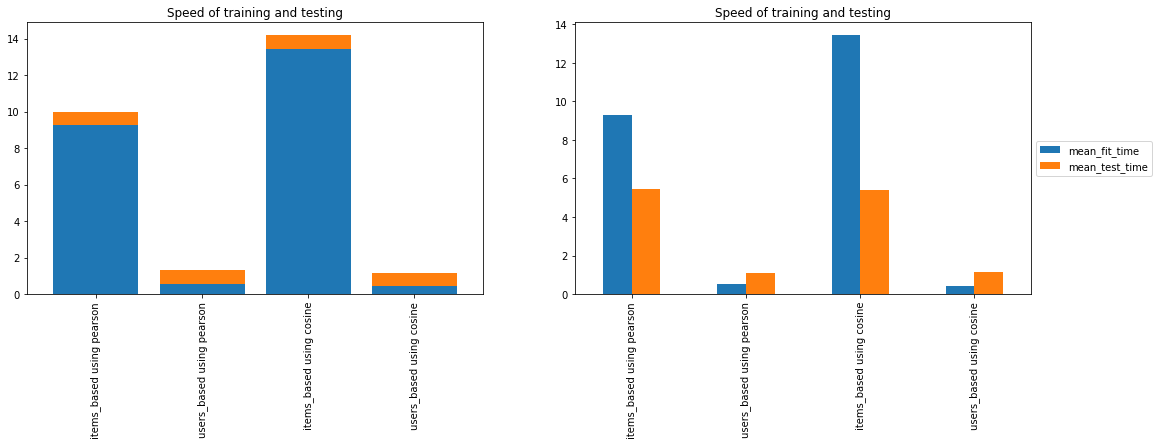

In [20]:
# Let us visualise time differences

fig, axes = plt.subplots(1,2, figsize= (18, 5))
benchmarking[['mean_fit_time','mean_test_mae']].plot(kind='bar', stacked=True, width=0.8, ax = axes[0], legend = False)
axes[0].set_title('Speed of training and testing', loc='center')
benchmarking[['mean_fit_time','mean_test_time']].plot.bar(ax = axes[1])
axes[1].set_title('Speed of training and testing', loc='center')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In overall
> - User-based is faster that item - based 
> - item -based is more accurate that user-based ( the most is with pearson correlation )

In [21]:
print(gs.best_params['rmse'])
# best RMSE score
print(gs.best_score['rmse'])

{'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [23]:
print(gs.best_params['mae'])
# best mae score
print(gs.best_score['mae'])

{'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


**Using the model create on question 2 it was also possible to complete this task**

In [25]:
# Since we already train the different model using the data imported in 1
# let us save them on df for better computation and visualisation
cv_users_cos_df = pd.DataFrame(cv_users_cos)
cv_users_pears_df = pd.DataFrame(cv_users_pears)
cv_items_cos_df = pd.DataFrame(cv_items_cos)
cv_items_pears_df = pd.DataFrame(cv_items_pears)

In [26]:
# Now we compute the mean for all the metrics and concatenate them into a dataframe
benchmarking = pd.concat([cv_users_cos_df.mean(), cv_users_pears_df.mean(), cv_items_cos_df.mean(), cv_items_pears_df.mean()], axis ='columns')

In [27]:
benchmarking = benchmarking.rename(columns = {0:'users_based using cosine', 1:'users_based using pearson', 2:'items_based using cosine', 3:'items_based using pearson'}) 

In [28]:
benchmarking

,users_based using cosine,users_based using pearson,items_based using cosine,items_based using pearson
test_rmse,0.971925,0.981814,0.975697,0.980435
test_mae,0.748884,0.755037,0.760778,0.753394
fit_time,0.416514,0.565281,13.395656,0.591781
test_time,1.114974,1.059424,5.209133,1.069726


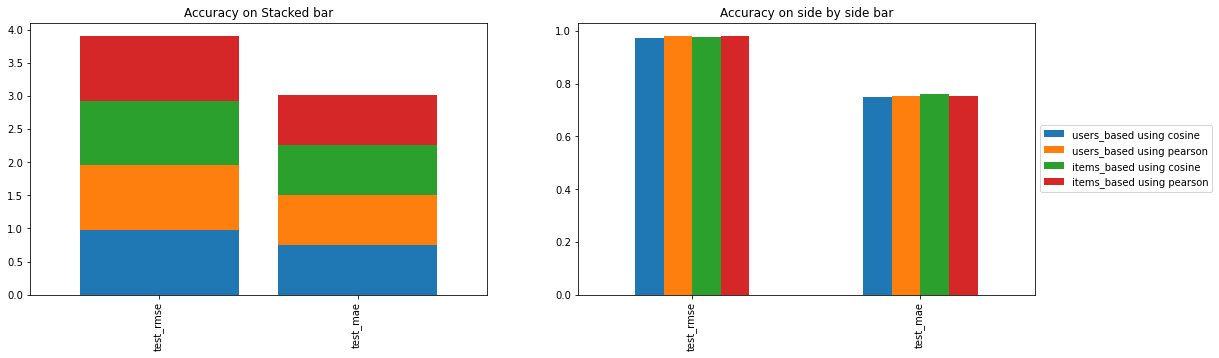

In [29]:
# Let us visualise accuracy metrics
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize= (18, 5))
benchmarking.loc[['test_rmse','test_mae']].plot(kind='bar', stacked=True, width=0.8, ax = axes[0], legend = False)
axes[0].set_title('Accuracy on Stacked bar', loc='center')
benchmarking.loc[['test_rmse','test_mae']].plot.bar(ax = axes[1])
axes[1].set_title('Accuracy on side by side bar', loc='center')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(title = 'Type of Algo')
plt.show()

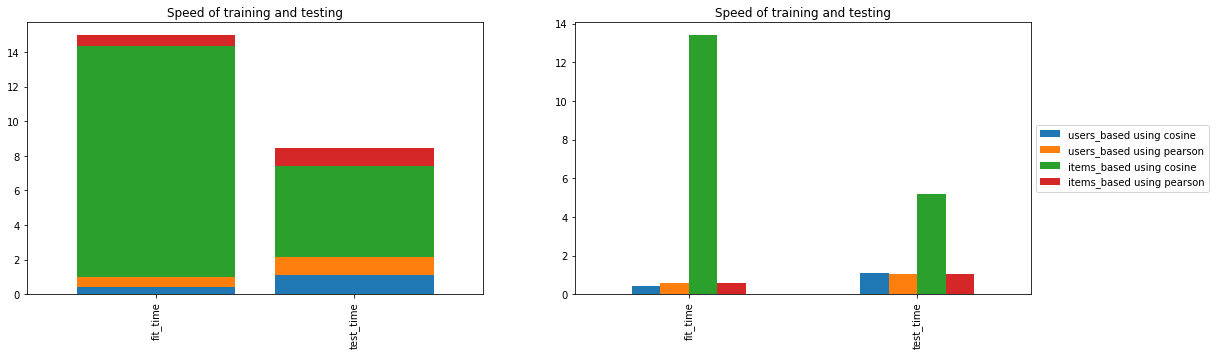

In [30]:
# Let us visualise Speed differences

fig, axes = plt.subplots(1,2, figsize= (18, 5))
benchmarking.loc[['fit_time','test_time']].plot(kind='bar', stacked=True, width=0.8, ax = axes[0], legend = False)
axes[0].set_title('Speed of training and testing', loc='center')
benchmarking.loc[['fit_time','test_time']].plot.bar(ax = axes[1])
axes[1].set_title('Speed of training and testing', loc='center')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()